<a href="https://colab.research.google.com/github/Uzayr-Ch/AI-Labs-Sem-5/blob/main/Iris_Dataset_EDA_n_DT_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Performing Exploratory Data Analysis (EDA) on IRIS flower dataset

In [5]:
# Importing data manipulation and visualization libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
# Load from seaborn's built-in dataset
df = sns.load_dataset('iris')
penguine_df = sns.load_dataset('penguins')

In [7]:
# Shape of the dataset
print("Shape:", df.shape)

Shape: (150, 5)


In [8]:
# Column names
print("Columns:", df.columns.tolist())

Columns: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']


In [9]:
# First few rows
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [10]:
# Basic info about dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [11]:
# Descriptive statistics
print(df.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


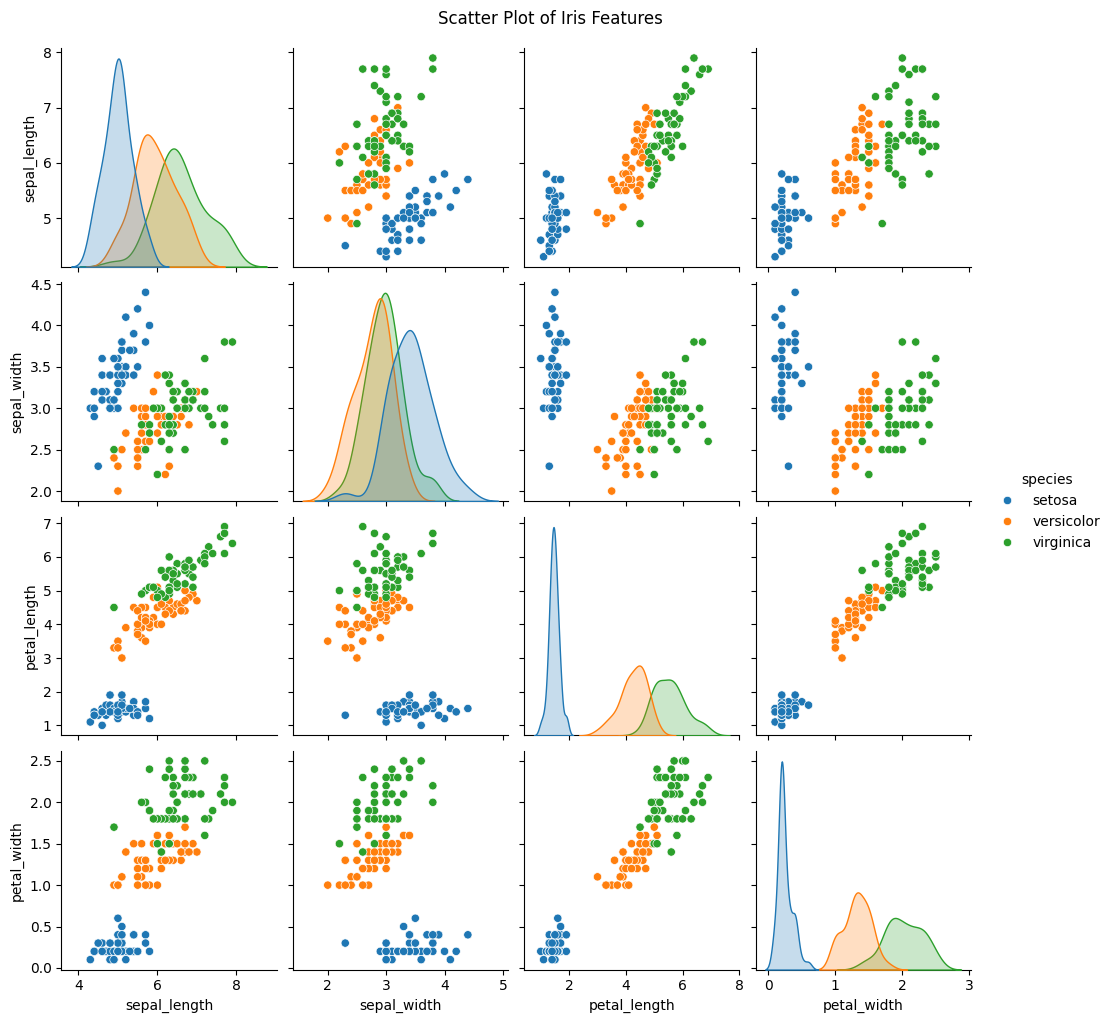

In [20]:
# Scatterpot
sns.pairplot(df, hue="species")
plt.suptitle("Scatter Plot of Iris Features", y=1.02)
plt.show()

In [ ]:
# Scatterpot
sns.pairplot(df, hue="species")
plt.suptitle("Scatter Plot of Iris Features", y=1.02)
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


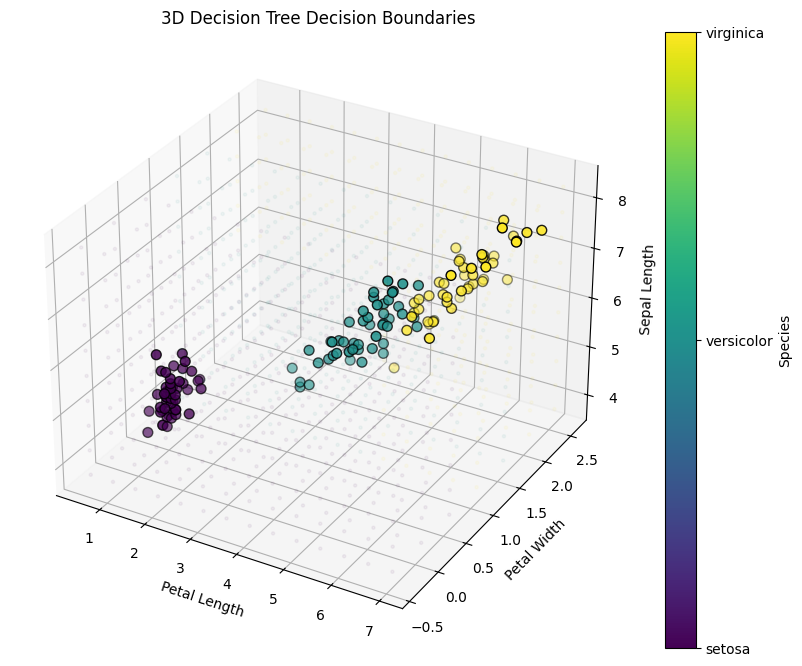

3D Decision Tree Accuracy (on visualization features): 0.993


In [25]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Select three features for 3D visualization (petal_length, petal_width, and sepal_length)
X_vis_3d = df[["petal_length", "petal_width", "sepal_length"]]
y_vis_3d = le.fit_transform(df["species"])

# Train a new decision tree on these 3 features
clf_3d = DecisionTreeClassifier(random_state=42, max_depth=4) # Increased max_depth for better separation
clf_3d.fit(X_vis_3d, y_vis_3d)

# Create a mesh grid for 3D
x_min, x_max = X_vis_3d.iloc[:, 0].min() - 0.5, X_vis_3d.iloc[:, 0].max() + 0.5
y_min, y_max = X_vis_3d.iloc[:, 1].min() - 0.5, X_vis_3d.iloc[:, 1].max() + 0.5
z_min, z_max = X_vis_3d.iloc[:, 2].min() - 0.5, X_vis_3d.iloc[:, 2].max() + 0.5

# Create a denser meshgrid for better visualization
xx, yy, zz = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1),
                         np.arange(z_min, z_max, 0.1))

# Predict class for each point in the mesh
# Reshape the meshgrid points to be compatible with predict
mesh_points = np.c_[xx.ravel(), yy.ravel(), zz.ravel()]

# Predict in batches to avoid memory issues if necessary, but for this dataset it should be fine
Z = clf_3d.predict(mesh_points)
Z = Z.reshape(xx.shape)

# Create the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot decision boundaries by plotting a subsample of the mesh points
# We'll plot the mesh points with colors based on their predicted class
# To avoid plotting too many points, we'll take a subset
step = 5 # Adjust this value to control the density of the boundary points
ax.scatter(xx[::step, ::step, ::step].ravel(),
           yy[::step, ::step, ::step].ravel(),
           zz[::step, ::step, ::step].ravel(),
           c=Z[::step, ::step, ::step].ravel(),
           alpha=0.05,  # Make the boundary points translucent
           cmap='viridis',
           marker='.')


# Plot data points
scatter = ax.scatter(X_vis_3d.iloc[:, 0], X_vis_3d.iloc[:, 1], X_vis_3d.iloc[:, 2],
                     c=y_vis_3d, cmap='viridis', edgecolors='k', s=50)

# Set labels and title
ax.set_xlabel('Petal Length')
ax.set_ylabel('Petal Width')
ax.set_zlabel('Sepal Length')
ax.set_title('3D Decision Tree Decision Boundaries')

# Add color bar
cbar = fig.colorbar(scatter, ticks=[0, 1, 2], label='Species')
cbar.ax.set_yticklabels(le.classes_)


plt.show()

print(f"3D Decision Tree Accuracy (on visualization features): {clf_3d.score(X_vis_3d, y_vis_3d):.3f}")
# The original 4D decision tree accuracy is not directly comparable here as we are using only 3 features for visualization
# print(f"Original 4D Decision Tree Accuracy: {clf.score(X_test, y_test):.3f}")

# Training a Decision Tree Classifier on this Dataset

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


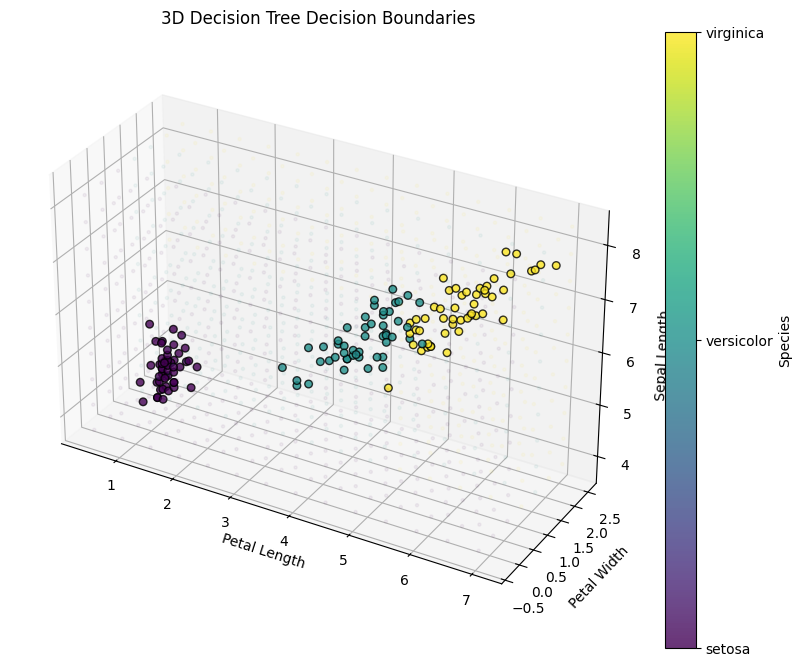

3D Decision Tree Accuracy (on visualization features): 0.993


In [26]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Select three features for 3D visualization (petal_length, petal_width, and sepal_length)
X_vis_3d = df[["petal_length", "petal_width", "sepal_length"]]
y_vis_3d = le.fit_transform(df["species"])

# Train a new decision tree on these 3 features
clf_3d = DecisionTreeClassifier(random_state=42, max_depth=4) # Increased max_depth for better separation
clf_3d.fit(X_vis_3d, y_vis_3d)

# Create a mesh grid for 3D
x_min, x_max = X_vis_3d.iloc[:, 0].min() - 0.5, X_vis_3d.iloc[:, 0].max() + 0.5
y_min, y_max = X_vis_3d.iloc[:, 1].min() - 0.5, X_vis_3d.iloc[:, 1].max() + 0.5
z_min, z_max = X_vis_3d.iloc[:, 2].min() - 0.5, X_vis_3d.iloc[:, 2].max() + 0.5

# Create a denser meshgrid for better visualization
xx, yy, zz = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1),
                         np.arange(z_min, z_max, 0.1))

# Predict class for each point in the mesh
# Reshape the meshgrid points to be compatible with predict
mesh_points = np.c_[xx.ravel(), yy.ravel(), zz.ravel()]

# Predict in batches to avoid memory issues if necessary, but for this dataset it should be fine
Z = clf_3d.predict(mesh_points)
Z = Z.reshape(xx.shape)

# Create the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot decision boundaries by plotting a subsample of the mesh points
# We'll plot the mesh points with colors based on their predicted class
# To avoid plotting too many points, we'll take a subset
step = 5 # Adjust this value to control the density of the boundary points
ax.scatter(xx[::step, ::step, ::step].ravel(),
           yy[::step, ::step, ::step].ravel(),
           zz[::step, ::step, ::step].ravel(),
           c=Z[::step, ::step, ::step].ravel(),
           alpha=0.05,  # Make the boundary points translucent
           cmap='viridis',
           marker='.')


# Plot data points with adjusted marker size and transparency
scatter = ax.scatter(X_vis_3d.iloc[:, 0], X_vis_3d.iloc[:, 1], X_vis_3d.iloc[:, 2],
                     c=y_vis_3d, cmap='viridis', edgecolors='k', s=30, alpha=0.8) # Reduced marker size and added transparency


# Set labels and title
ax.set_xlabel('Petal Length')
ax.set_ylabel('Petal Width')
ax.set_zlabel('Sepal Length')
ax.set_title('3D Decision Tree Decision Boundaries')

# Add color bar
cbar = fig.colorbar(scatter, ticks=[0, 1, 2], label='Species')
cbar.ax.set_yticklabels(le.classes_)

# Set equal aspect ratio (this might not work perfectly in all 3D plots but can help)
ax.set_box_aspect([np.ptp(X_vis_3d.iloc[:, 0]), np.ptp(X_vis_3d.iloc[:, 1]), np.ptp(X_vis_3d.iloc[:, 2])])


plt.show()

print(f"3D Decision Tree Accuracy (on visualization features): {clf_3d.score(X_vis_3d, y_vis_3d):.3f}")
# The original 4D decision tree accuracy is not directly comparable here as we are using only 3 features for visualization
# print(f"Original 4D Decision Tree Accuracy: {clf.score(X_test, y_test):.3f}")

In [21]:
# Importing Libraries for Model Training
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [14]:
# Features and target
X = df.drop("species", axis=1)
y = df["species"]

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

Accuracy: 0.9333333333333333

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



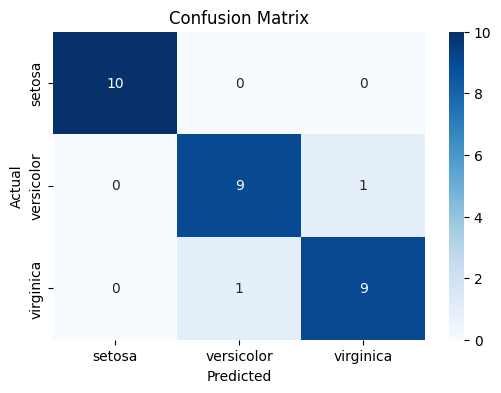

In [15]:
# Train Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

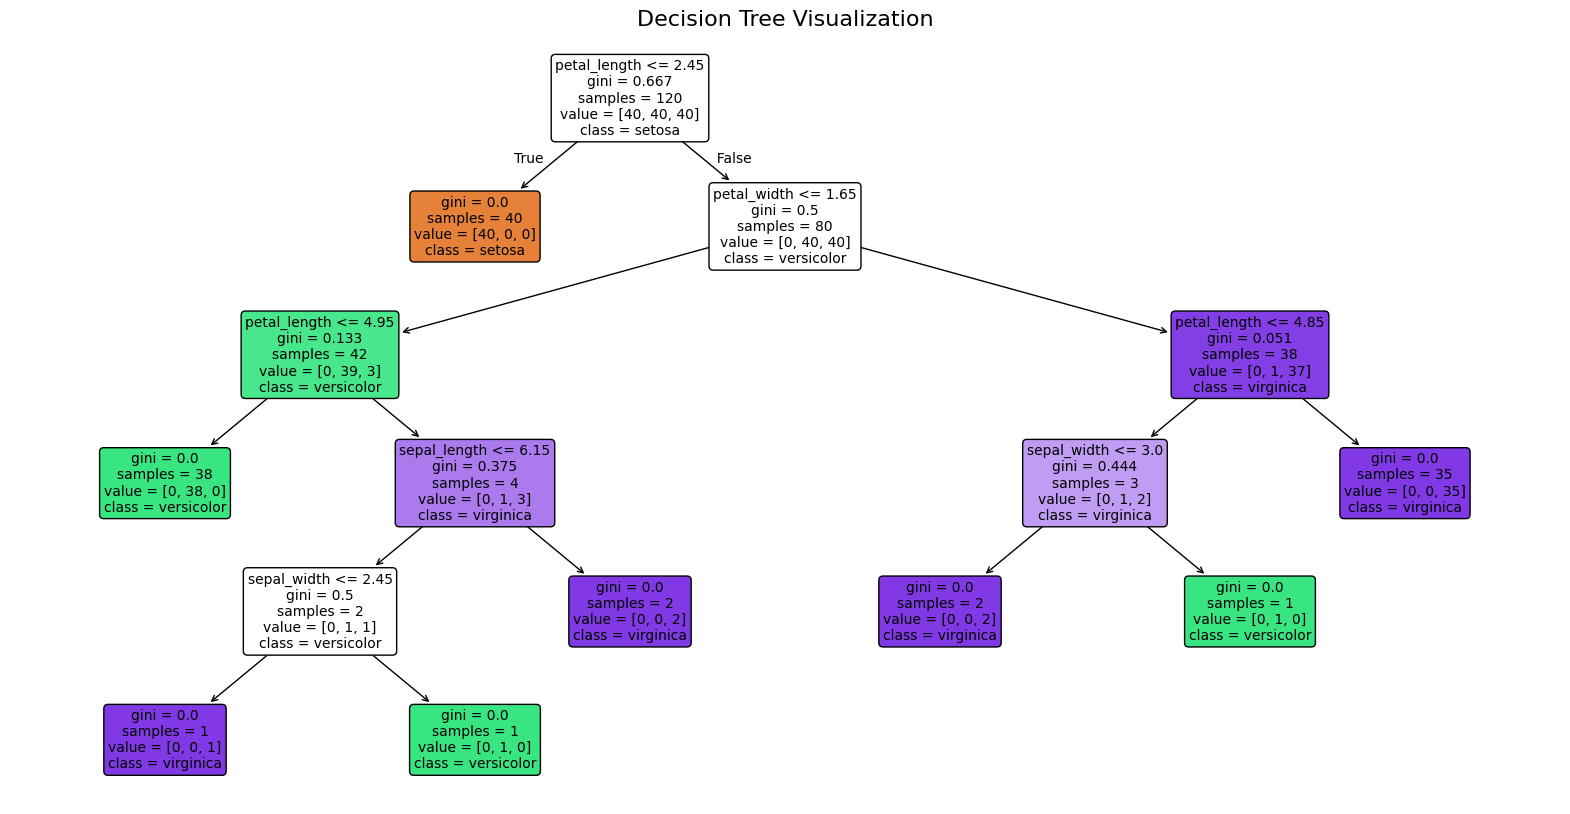

Decision Tree Rules:
|--- petal_length <= 2.45
|   |--- class: 0
|--- petal_length >  2.45
|   |--- petal_width <= 1.65
|   |   |--- petal_length <= 4.95
|   |   |   |--- class: 1
|   |   |--- petal_length >  4.95
|   |   |   |--- sepal_length <= 6.15
|   |   |   |   |--- sepal_width <= 2.45
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- sepal_width >  2.45
|   |   |   |   |   |--- class: 1
|   |   |   |--- sepal_length >  6.15
|   |   |   |   |--- class: 2
|   |--- petal_width >  1.65
|   |   |--- petal_length <= 4.85
|   |   |   |--- sepal_width <= 3.00
|   |   |   |   |--- class: 2
|   |   |   |--- sepal_width >  3.00
|   |   |   |   |--- class: 1
|   |   |--- petal_length >  4.85
|   |   |   |--- class: 2



In [16]:
# Visualize the Decision Tree Structure
from sklearn.tree import plot_tree, export_text
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf,
          feature_names=X.columns,
          class_names=le.classes_,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree Visualization", fontsize=16)
plt.show()

# Print text representation of the tree
print("Decision Tree Rules:")
print("=" * 50)
tree_rules = export_text(clf, feature_names=list(X.columns))
print(tree_rules)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


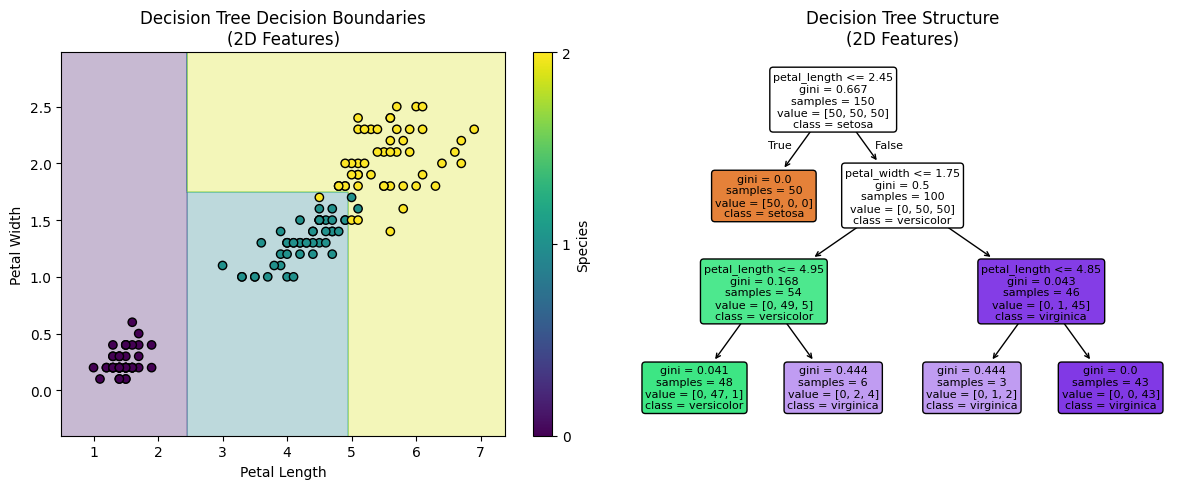

2D Decision Tree Accuracy: 0.973
Original 4D Decision Tree Accuracy: 0.933


In [17]:
# Decision Tree Decision Boundaries Visualization
import numpy as np

# Select two features for 2D visualization (petal_length and petal_width work well)
X_vis = df[["petal_length", "petal_width"]]
y_vis = le.fit_transform(df["species"])

# Train a new decision tree on just these 2 features
clf_2d = DecisionTreeClassifier(random_state=42, max_depth=3)
clf_2d.fit(X_vis, y_vis)

# Create a mesh grid
x_min, x_max = X_vis.iloc[:, 0].min() - 0.5, X_vis.iloc[:, 0].max() + 0.5
y_min, y_max = X_vis.iloc[:, 1].min() - 0.5, X_vis.iloc[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict class for each point in the mesh
Z = clf_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create the plot
plt.figure(figsize=(12, 5))

# First subplot: Decision boundaries
plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
scatter = plt.scatter(X_vis.iloc[:, 0], X_vis.iloc[:, 1], c=y_vis, cmap='viridis', edgecolors='black')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Decision Tree Decision Boundaries\n(2D Features)')
plt.colorbar(scatter, ticks=[0, 1, 2], label='Species')

# Second subplot: The 2D decision tree structure
plt.subplot(1, 2, 2)
plot_tree(clf_2d,
          feature_names=['petal_length', 'petal_width'],
          class_names=le.classes_,
          filled=True,
          rounded=True,
          fontsize=8)
plt.title('Decision Tree Structure\n(2D Features)')

plt.tight_layout()
plt.show()

print(f"2D Decision Tree Accuracy: {clf_2d.score(X_vis, y_vis):.3f}")
print(f"Original 4D Decision Tree Accuracy: {clf.score(X_test, y_test):.3f}")

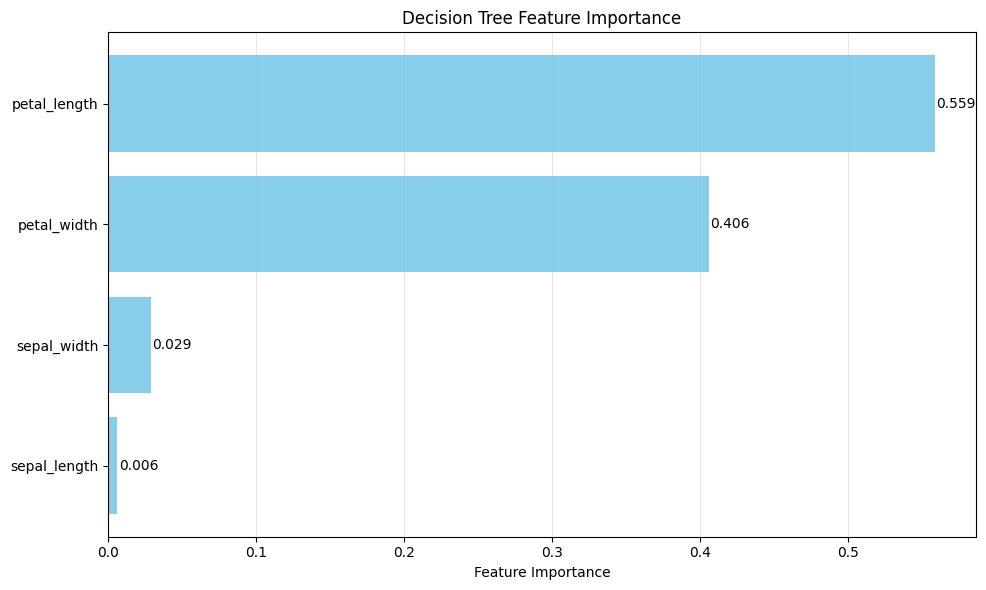

Feature Importance Rankings:
sepal_length   : 0.0062
sepal_width    : 0.0292
petal_width    : 0.4060
petal_length   : 0.5586


In [18]:
# Feature Importance Visualization
feature_importance = clf.feature_importances_
feature_names = X.columns

# Create a DataFrame for easier plotting
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values('Importance', ascending=True)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Decision Tree Feature Importance')
plt.grid(axis='x', alpha=0.3)

# Add importance values on bars
for i, v in enumerate(importance_df['Importance']):
    plt.text(v + 0.001, i, f'{v:.3f}', va='center')

plt.tight_layout()
plt.show()

# Print feature importance values
print("Feature Importance Rankings:")
print("=" * 30)
for feature, importance in zip(importance_df['Feature'], importance_df['Importance']):
    print(f"{feature:15s}: {importance:.4f}")